AML 2024 Exam notebook

The note book is completed by Viktor Juhl Jensen, Ali Aljundi & Sofus Pedersen

In [36]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [37]:
df = pd.read_csv('ai4i2020.csv')

df = df.drop(['UDI', 'Product ID','Type','TWF','HDF','PWF','OSF','RNF'], axis=1)

df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0


text

In [38]:
corr_matrix = df.corr()
corr_matrix['Machine failure'].sort_values(ascending=False)

Machine failure            1.000000
Torque [Nm]                0.191321
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Process temperature [K]    0.035946
Rotational speed [rpm]    -0.044188
Name: Machine failure, dtype: float64

In [39]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [67]:
from sklearn.preprocessing import StandardScaler

x = df.drop(['Machine failure'], axis=1)
y = df['Machine failure']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# RandomForestClassifier

In [71]:
from sklearn.ensemble import RandomForestClassifier
 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

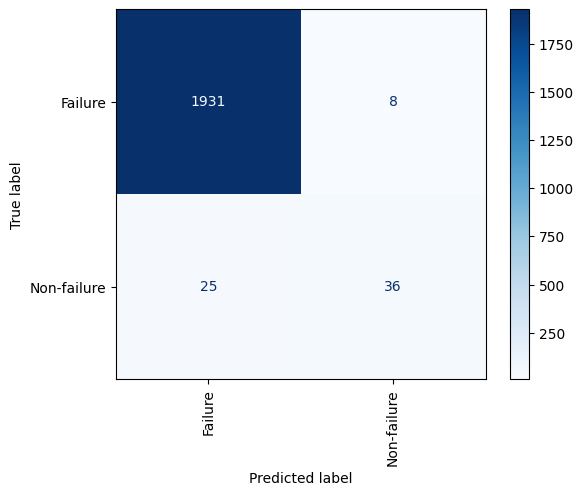

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

sns.reset_orig()
y_predicted = rf_model.predict(X_test) >= 1
labels = ['Failure', 'Non-failure']
cmd.from_predictions(y_test, y_predicted, display_labels=labels, cmap='Blues', xticks_rotation='vertical')
plt.show()

In [111]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("\nEvaluating the Model...")
y_pred = rf_model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Evaluating the Model...

Confusion Matrix:
[[1931    8]
 [  25   36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.82      0.59      0.69        61

    accuracy                           0.98      2000
   macro avg       0.90      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000


Accuracy Score:
0.9835


In [74]:
print("\nFeature Importances:")
importances = pd.Series(rf_model.feature_importances_, index=df.columns[:-1])
print(importances.sort_values(ascending=False))


Feature Importances:
Torque [Nm]                0.320955
Rotational speed [rpm]     0.214712
Air temperature [K]        0.161565
Tool wear [min]            0.153936
Process temperature [K]    0.148831
dtype: float64


# GradientBoostingRegressor

In [114]:
from sklearn.ensemble import GradientBoostingRegressor
 
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

y_pred = gbr_model.predict(X_test)

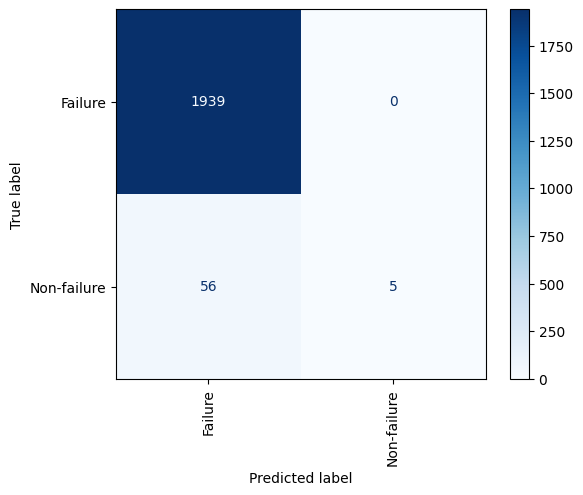

In [115]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

sns.reset_orig()
y_predicted = gbr_model.predict(X_test) >= 1
labels = ['Failure', 'Non-failure']
cmd.from_predictions(y_test, y_predicted, display_labels=labels, cmap='Blues', xticks_rotation='vertical')
plt.show()

# Neural Network

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential() 
model.add(Dense(1024, activation='relu', input_dim=5))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

c:\Users\bemme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 1024)           │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 2048)           │     2,099,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,107,393 (8.04 MB)

 Trainable params: 2,107,393 (8.04 MB)

 Non-trainable params: 0 (0.00 B)

In [137]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=100)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8635 - loss: 66.5421 - val_accuracy: 0.9660 - val_loss: 2.5236
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9390 - loss: 3.3656 - val_accuracy: 0.9660 - val_loss: 1.4304
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9373 - loss: 1.7974 - val_accuracy: 0.9660 - val_loss: 11.5666
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9344 - loss: 6.0156 - val_accuracy: 0.9610 - val_loss: 0.1894
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9523 - loss: 0.3276 - val_accuracy: 0.9625 - val_loss: 0.1893
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9614 - loss: 0.1664 - val_accuracy: 0.9665 - val_loss: 0.2668
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9692 - loss: 0.1367 - val_accuracy: 0.9680 - val_loss: 0.2097
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9513 - loss: 0.2666 - val_accuracy: 0.9585 -

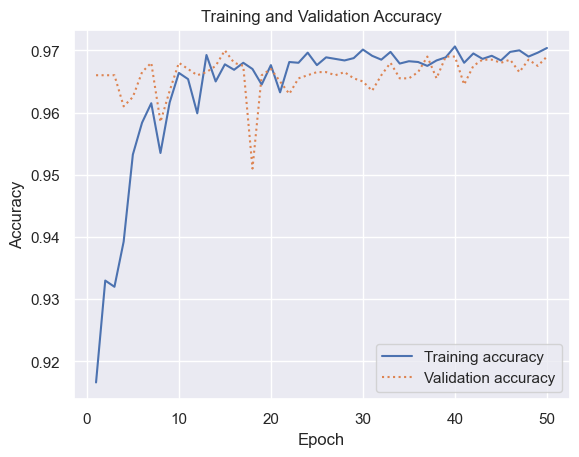

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


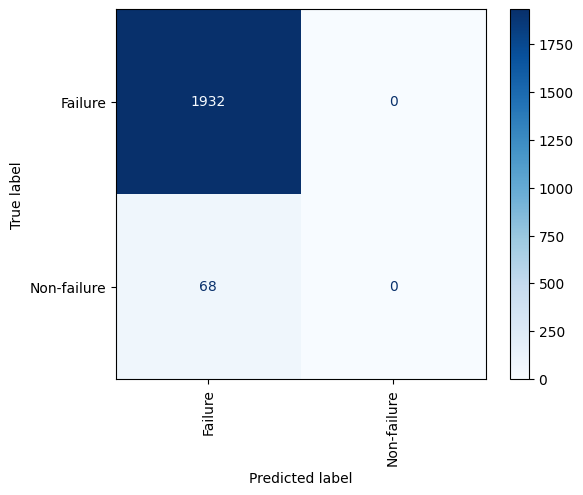

In [139]:
sns.reset_orig()
y_predicted = model.predict(x_test) >= 1
labels = ['Failure', 'Non-failure']
cmd.from_predictions(y_test, y_predicted, display_labels=labels, cmap='Blues', xticks_rotation='vertical')
plt.show()